#**Haberman's survival dataset**#


*   Title: Haberman's Survival Data
*   Sources:
(a) Donor: Tjen-Sien Lim (limt@stat.wisc.edu)
(b) Date: March 4, 1999
*   Number of Instances: 306
*   Number of Attributes: 4 (including the class attribute)
*    Attribute Information:
        - Age of patient at time of operation (numerical)
        - Patient's year of operation (year - 1900, numerical)
        - Number of positive axillary nodes detected (numerical)
        - Survival status (class attribute)
          1 = the patient survived 5 years or longer
          2 = the patient died within 5 year




#**Importing dataset and going through summary statistics**#

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns
import warnings 

warnings.filterwarnings("ignore") 


In [ ]:
path = "/content/sample_data/haberman.csv"

In [ ]:
df = pd.read_csv(path)

In [ ]:
df.head()

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   age     306 non-null    int64
 1   year    306 non-null    int64
 2   nodes   306 non-null    int64
 3   status  306 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


**Observations**

- There are 306 entries
- No missing values
- 4 attributes including class attribute

#**Objective**#

Attributes - Age of patient,year of operation,Number of positive axillary nodes to be used to predict if a patient will survive after 5 years

#**Plotting 1-D histograms**#

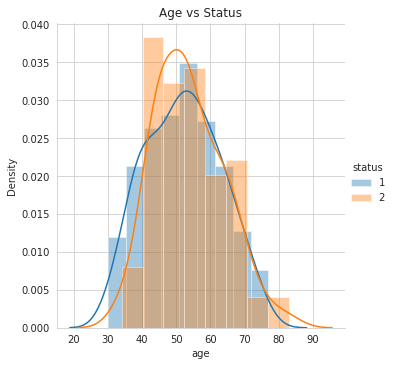

In [ ]:
#Plotting 1-D histograms on attributes

sns.FacetGrid(df, hue="status", size=5) \
   .map(sns.distplot, "age") \
   .add_legend();

plt.title("Age vs Status")
plt.show();


- Age alone can't determine whether the patient will live after 5 years as there is no clear separation between attributes
- Lesser the age, more the chances that patient will live after 5 years
- above age of 90 the chances of surving after surgery is nil

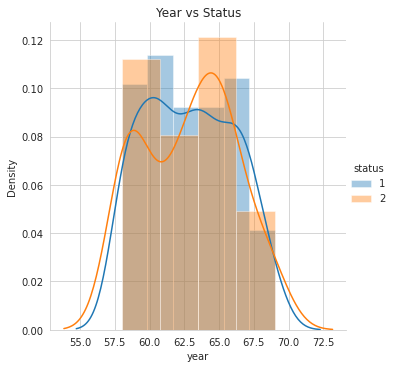

In [ ]:
sns.FacetGrid(df, hue="status", size=5) \
   .map(sns.distplot, "year") \
   .add_legend();

plt.title("Year vs Status")
plt.show();

- There is no clear relation b/w year and status

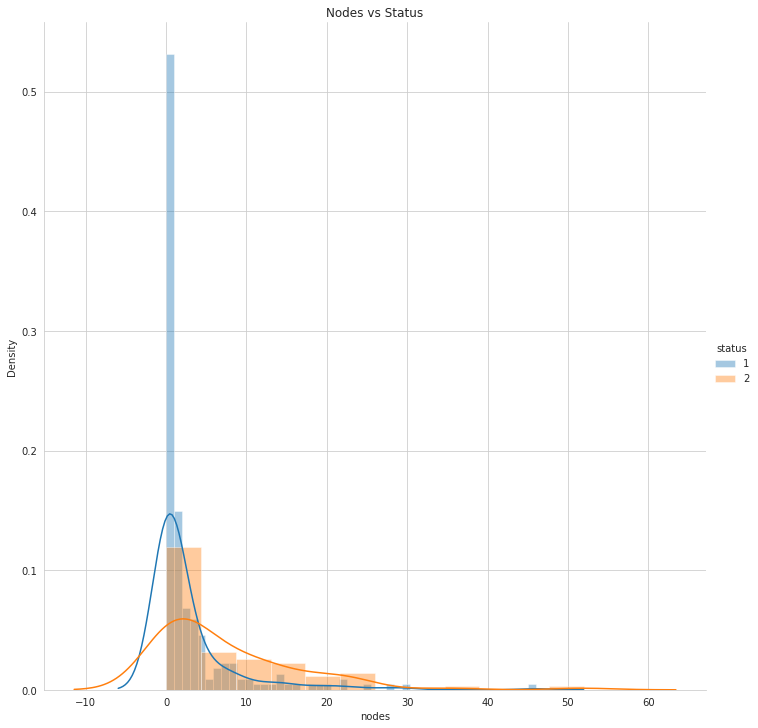

In [ ]:
sns.FacetGrid(df, hue="status", size=10) \
   .map(sns.distplot, "nodes") \
   .add_legend();

plt.title("Nodes vs Status")
plt.show();

- Patients with 1 & 2 axilary nodes have the highest survival rate
- For patients above 55 axilary nodes the survival rate is nil
- Axilary nodes are the only attribute which provides some significant information about the survival rate of patients

#**Descriptive statistics**#

In [ ]:
#Splitting the dataframe into survived and died

haberman_survived = df.loc[df["status"]==1]
haberman_dead = df.loc[df["status"]==2]

In [ ]:
#Descriptive statistics of both dataframes

haberman_survived.describe()

,age,year,nodes,status
count,225.000000,225.000000,225.000000,225.0
mean,52.017778,62.862222,2.791111,1.0
std,11.012154,3.222915,5.870318,0.0
min,30.000000,58.000000,0.000000,1.0
25%,43.000000,60.000000,0.000000,1.0
50%,52.000000,63.000000,0.000000,1.0
75%,60.000000,66.000000,3.000000,1.0
max,77.000000,69.000000,46.000000,1.0


- mean of 2.79 and 75% quartile value of 3 indicates that most of the survived patients ( 75%) were having 3 or less nodes
- Chances of a person surviving with higher number of nodes is very low

In [ ]:
haberman_dead.describe()

,age,year,nodes,status
count,81.000000,81.000000,81.000000,81.0
mean,53.679012,62.827160,7.456790,2.0
std,10.167137,3.342118,9.185654,0.0
min,34.000000,58.000000,0.000000,2.0
25%,46.000000,59.000000,1.000000,2.0
50%,53.000000,63.000000,4.000000,2.0
75%,61.000000,65.000000,11.000000,2.0
max,83.000000,69.000000,52.000000,2.0


- 50 percentile value of axilary nodes for died patients is 4. Which indicates that lesser number of nodes does not guarantee that patient will survive

#**Box Plot**#

No handles with labels found to put in legend.


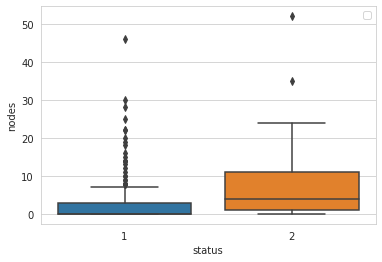

In [ ]:
#Plotting box plots
sns.boxplot(x='status',y='nodes', data=df)
plt.legend()
plt.show()

- There are many outlier points for survived class
- Though 75th percentile of survived class is at node = 5, there are many exceptions on that

#**CDF and PDF**#

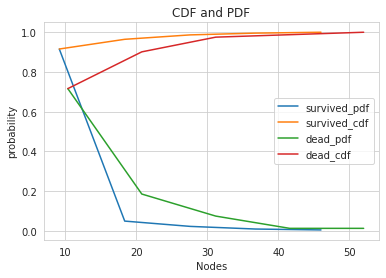

In [ ]:
#Plotting PDF and CDF of nodes on both dataframes

counts,bin_edges = np.histogram(haberman_survived["nodes"],bins =5,density = True)

pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)

plt.plot(bin_edges[1:],pdf,label = "survived_pdf")
plt.plot(bin_edges[1:],cdf,label = "survived_cdf")

counts,bin_edges = np.histogram(haberman_dead["nodes"],bins =5,density = True)

pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)

plt.plot(bin_edges[1:],pdf,label = "dead_pdf")
plt.plot(bin_edges[1:],cdf,label = "dead_cdf")
plt.xlabel("Nodes")
plt.ylabel("probability")
plt.title("CDF and PDF")
plt.legend()
plt.show()

- The above plot re-validtaes the descriptive statistics that lesser number of nodes does not guarantee that patient will survive
- Higher number of occurances of patients dying and surviving are at lowe nodes
- CDF shows that patients with lower nodes have better chances of surviving but its not guranteed

#**Pair Plots**#

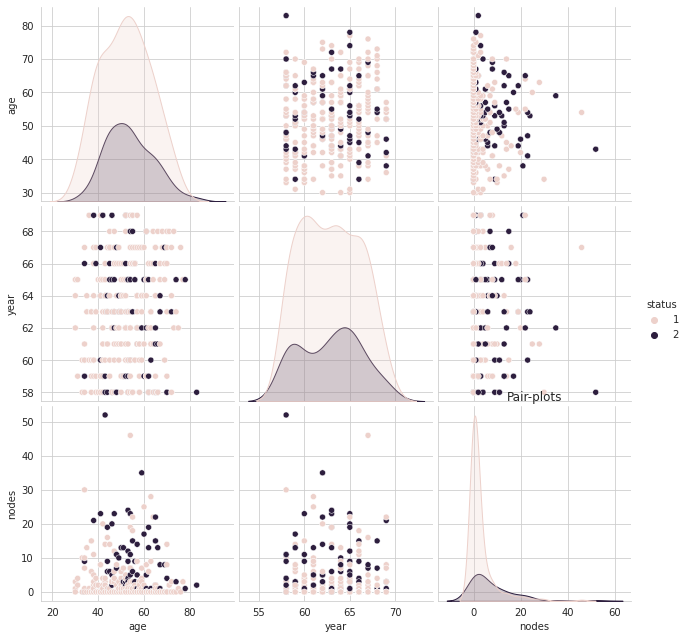

In [ ]:
#Plotting pair-plots

sns.set_style("whitegrid");
sns.pairplot(df, hue="status", size=3);
plt.show()

#**Conclusions**#


- There is no clear separation of classes on any of the sctter plots
- patients having age less than 40 and axilary nodes less than 10 have very high chance of surviving
- The survival rate of patients having nodes less than 5 have improved after year 1965